# Table of Contents

* [1 Introduction](#introduction)
    * [1.1 File descriptions](#file_descriptions)
    * [1.2 Data fields](#data_fields)
* [2 Prerequisite](#prerequisite)
    * [2.1 Loading required libraries](#libraries)
    * [2.2 Loading the data](#data)
* [3 Exploratory data analysis](#eda)

# 1 Introduction <a class="anchor" id="introduction"></a>

## 1.1 File descriptions <a class="anchor" id="file_descriptions"></a>

* **train.csv** - the training set
* **test.csv** - the test set
* **data_description.txt** - full description of each column
* **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## 1.2 Data fields <a class="anchor" id="data_fields"></a>

A brief version of what you'll find in the data description file
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# 2 Prerequisite <a class="anchor" id="prerequisite"></a>

## 2.1 Loading required libraries <a class="anchor" id="libraries"></a>

In [2]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


## 2.2 Loading the data <a class="anchor" id="data"></a>

In [3]:
train = pd.read_csv('data/train.csv') 

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 3 Exploratory data analysis <a class="anchor" id="eda"></a>

### Filter method,  Pearson Correlation (Spearman could be better)
Limit of this method, way too much correlations between each other for linear regression (tideous work).  
It is also less accurate, convenient while doing EDA only.

<IPython.core.display.Javascript object>


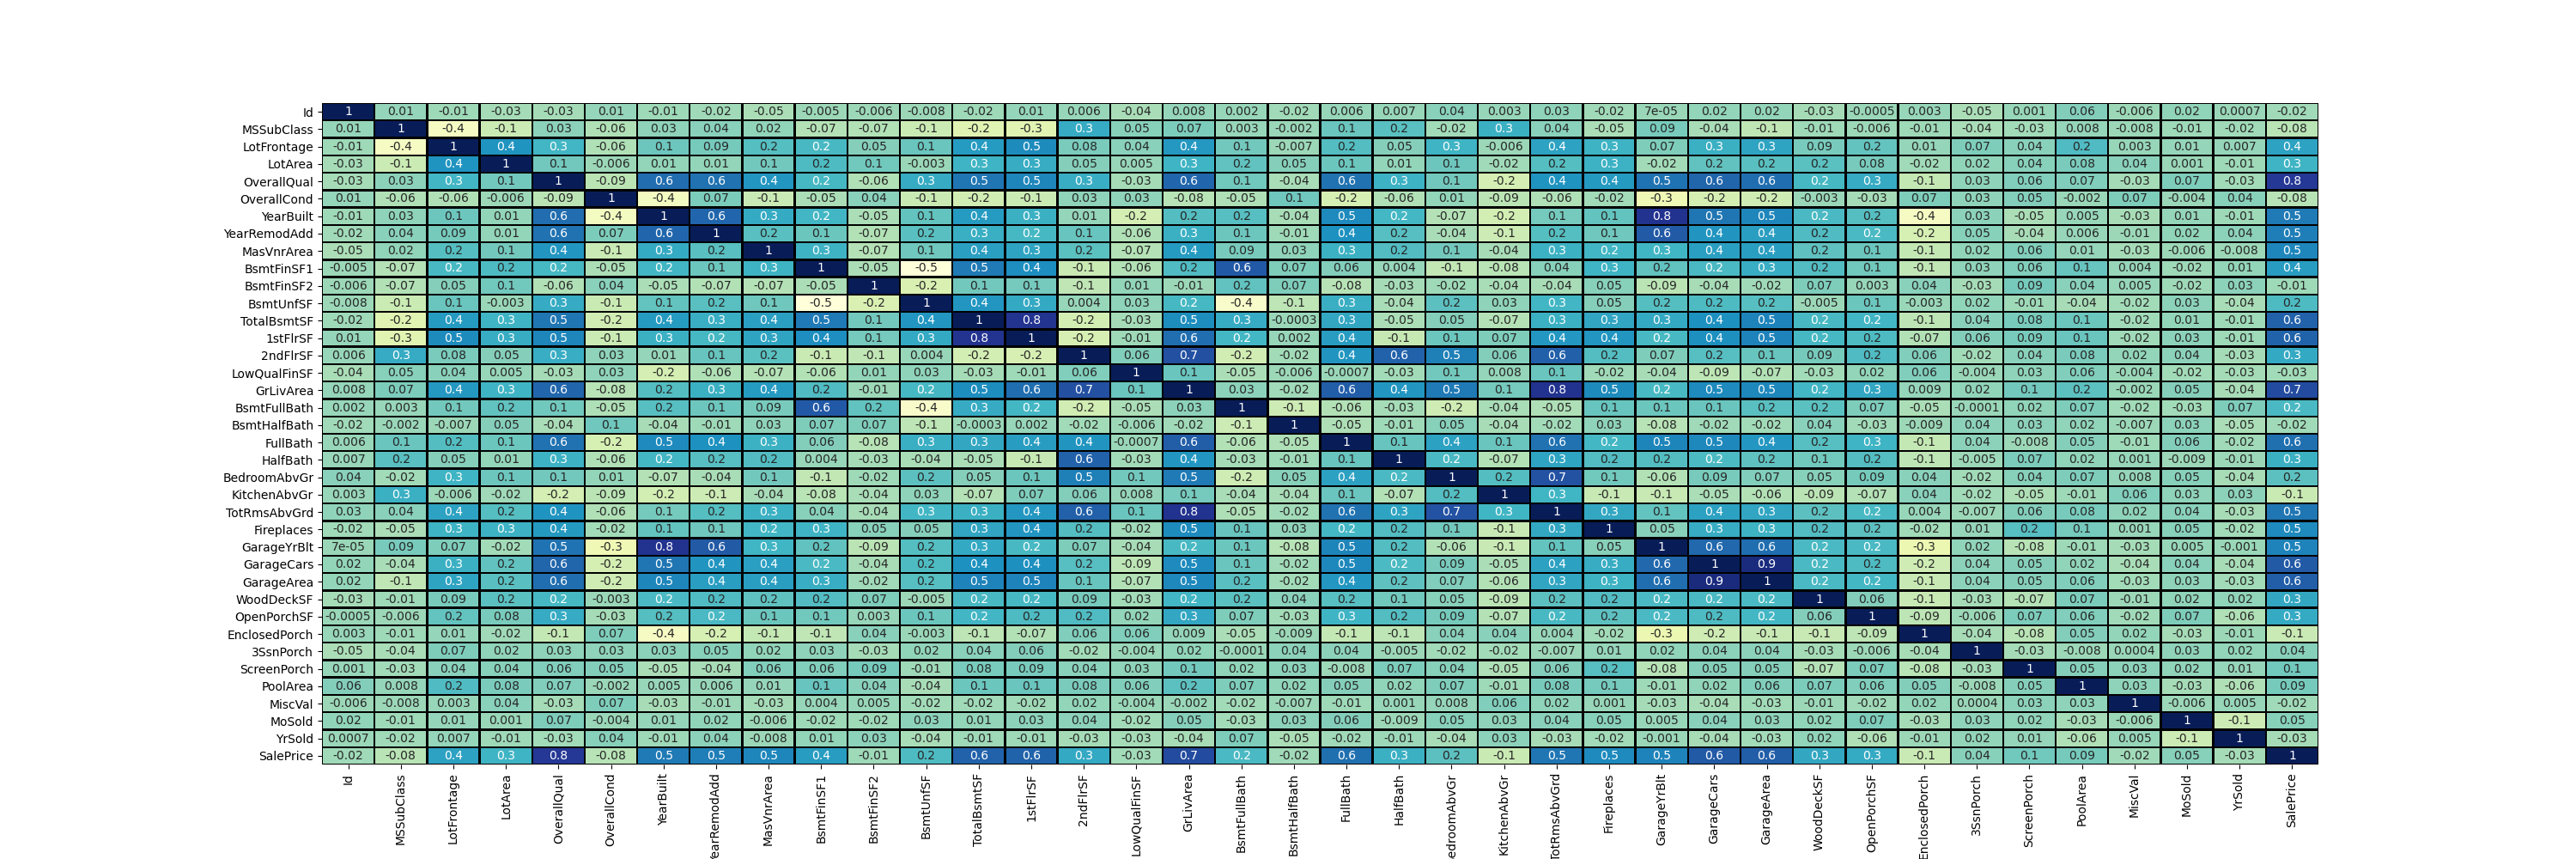

In [7]:
plt.figure(figsize=(30,10))

cor = train.corr()

heatmap = sns.heatmap(cor, annot = True, cmap = "YlGnBu", fmt = '.1g', 
                      linewidths = 1, linecolor='black', square = False,
                      cbar = False, cbar_kws = {'orientation': 'horizontal'}) # cmap="YlGnBu",plt.cm.Reds
fig = heatmap.get_figure()

fig.savefig("heatmap_correlation.png")

plt.show()

### Multivariable Linear Regression (continuous variable)

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>


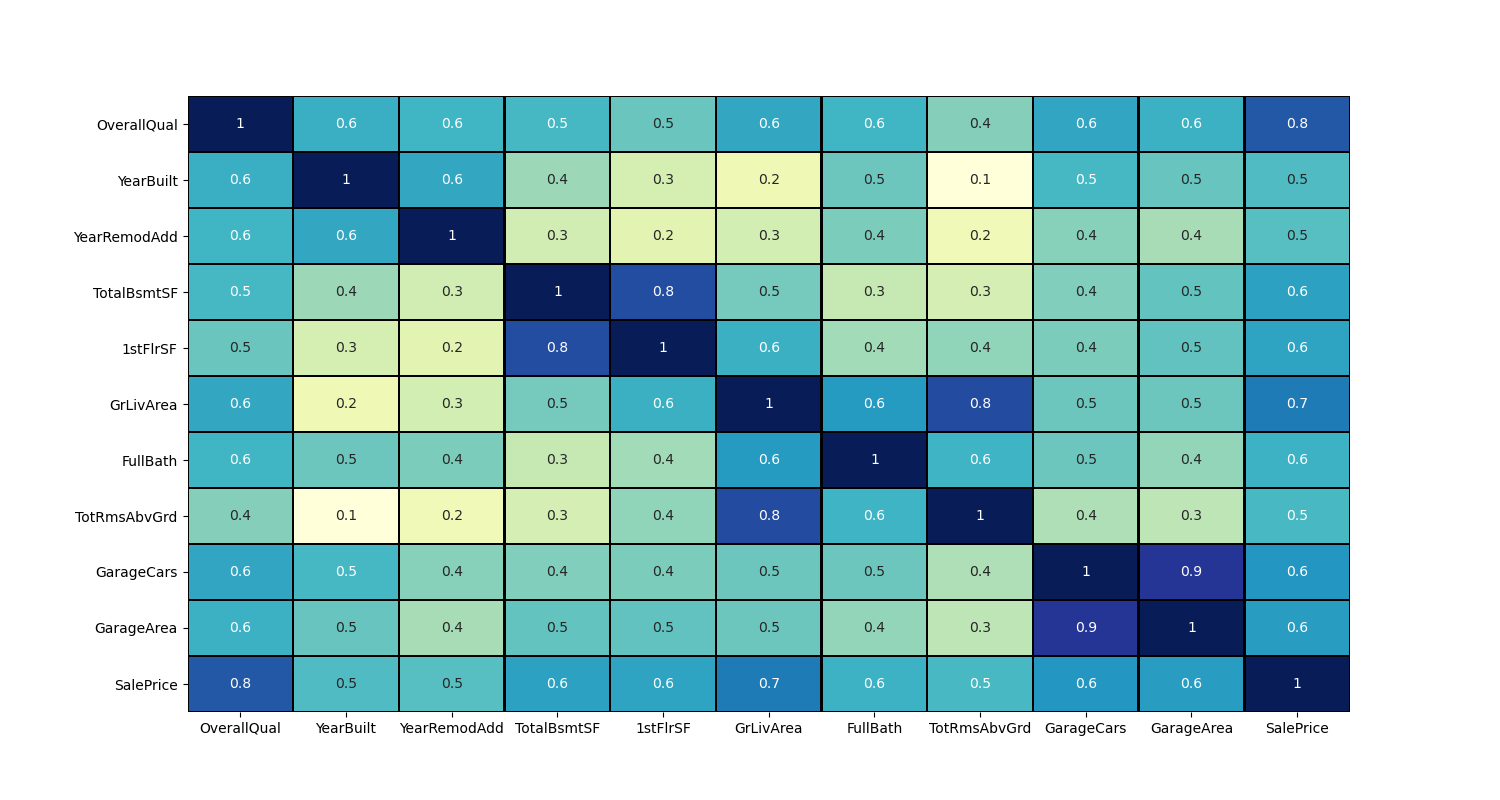

In [8]:
#def pearsonr_pval(x,y): # t0 retrieve the statistical significance
#    return stats.pearsonr(x,y)[1]
#corr = train.corr(method=pearsonr_pval) # Here the sample might not be big enough to use p

target = abs(cor["SalePrice"])
relevant_features = target[target>0.5] # let's keep only highly correlated features
display(relevant_features)

# Linear regression: independent variables need to be uncorrelated with each other
df_check = train[relevant_features.index]

plt.figure(figsize=(15,8))

cor2 = df_check.corr()

heatmap = sns.heatmap(cor2, annot = True, cmap = "YlGnBu", fmt = '.1g', 
                      linewidths = 1, linecolor='black', square = False,
                      cbar = False, cbar_kws = {'orientation': 'horizontal'}) # cmap="YlGnBu",plt.cm.Reds
plt.show()

In [16]:
features = df_check.drop(['SalePrice','GarageCars','GarageArea','TotRmsAbvGrd','TotalBsmtSF'],1)

sc = StandardScaler()
features = sc.fit_transform(features)

x = features # predictor
y = df_check.SalePrice # response

#x_train, y_train = x, y # for the submission
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=9)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_pred = linreg.predict(x_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(test_set_rmse) # the lower that value is, the better the fit

38706.006274336556


### Multivariable Linear Regression + Dummy encoding variable

In [10]:
train_dummy = pd.get_dummies(train, drop_first=True) # drop_first=False -> One-Hot encoding (k variables)
display(train_dummy)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


In [19]:
cor = train_dummy.corr()

target = abs(cor["SalePrice"])
relevant_features = target[target>0.5] # let's keep only highly correlated features
display(relevant_features)

#print(stats.pearsonr(train_dummy['ExterQual_TA'], train_dummy['KitchenQual_TA'])[0])   

df_check_dummy = train_dummy[relevant_features.index]

features = df_check_dummy.drop(['SalePrice','GarageCars','GarageArea','TotRmsAbvGrd',
                                'TotalBsmtSF'],1)
sc = StandardScaler()
features = sc.fit_transform(features)

x = features # predictor
y = df_check.SalePrice # response

#x_train, y_train = x, y # for the submission
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=9)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_pred = linreg.predict(x_test)
#test_set_rmse = np.sqrt(mean_squared_log_error(y_test, y_pred))
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(test_set_rmse) # the lower that value is, the better the fit

# Cross-validation
lin_scores = cross_val_score(linreg, x, y, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    #print("Scores:", scores)
    print("Corss-validation:", scores.mean())
    #print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

OverallQual       0.790982
YearBuilt         0.522897
YearRemodAdd      0.507101
TotalBsmtSF       0.613581
1stFlrSF          0.605852
GrLivArea         0.708624
FullBath          0.560664
TotRmsAbvGrd      0.533723
GarageCars        0.640409
GarageArea        0.623431
SalePrice         1.000000
ExterQual_TA      0.589044
KitchenQual_TA    0.519298
Name: SalePrice, dtype: float64

38571.22908190141
Corss-validation: 38166.59783857422


### Decision tree (worst than linear regression)

In [20]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(test_set_rmse) 

44866.66652488008


### Random Forest (better than linear regression)

In [21]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(x_train, y_train)
y_pred = forest_reg.predict(x_test) 
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(test_set_rmse) 

# Cross-validation
forest_scores = cross_val_score(forest_reg, x, y, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

def display_scores(scores):
    #print("Scores:", scores)
    print("Cross-validation:", scores.mean())
    #print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

30006.183196995546
Cross-validation: 31765.462083431114


### Support vector machine (worst model)

In [22]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(x_train, y_train)
y_pred = svm_reg.predict(x_test)
svm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(svm_rmse) 

85121.93776353965


### Submission

In [15]:
# Same for test
# test = pd.read_csv('data/test.csv') 
# feature_test = relevant_features.drop('SalePrice',0)
# x_test = features_test

# y_pred = linreg.predict(x_test)
# display(y_pred)